# Imports

In [7]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics


## Dataset

In [8]:
print("=====================================")
print("Data ophalen en voorbereiden")

mnist = tf.keras.datasets.mnist

# 'x' is pixel data, 'y' is de classificatie label (een nummer in dit geval)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Record verdeling in train en test data
print(f"Data:")
print(f"Train data {x_train.shape}")
print(f"Test data {x_test.shape}")
print(f"Unieke waarden in y_train: {np.unique(y_train)}")
print(f"Unieke waarden in y_test: {np.unique(y_test)}")
print("=====================================")

Data ophalen en voorbereiden
Data:
Train data (60000, 28, 28)
Test data (10000, 28, 28)
Unieke waarden in y_train: [0 1 2 3 4 5 6 7 8 9]
Unieke waarden in y_test: [0 1 2 3 4 5 6 7 8 9]


### Data Bewerken

In [9]:
print("=====================================")
print("Data normaliseren")

# Normaliseer de data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Record verdeling in train en test data
print(f"Data:")
print(f"Train data {x_train.shape}")
print(f"Test data {x_test.shape}")
print(f"Unieke waarden in y_train: {np.unique(y_train)}")
print(f"Unieke waarden in y_test: {np.unique(y_test)}")
print("=====================================")



Data normaliseren
Data:
Train data (60000, 28, 28)
Test data (10000, 28, 28)
Unieke waarden in y_train: [0 1 2 3 4 5 6 7 8 9]
Unieke waarden in y_test: [0 1 2 3 4 5 6 7 8 9]


## ML Model

In [87]:
print("=====================================")
print("Model maken en trainen")

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(28, 28))) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

print("=====================================")



Model maken en trainen
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8581 - loss: 0.5246 - val_accuracy: 0.9279 - val_loss: 0.2463


### Model Evaluatie

Model evaluatie op gefilterde testdata
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9163 - loss: 0.2758
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
AUROC: 0.9953345848079692


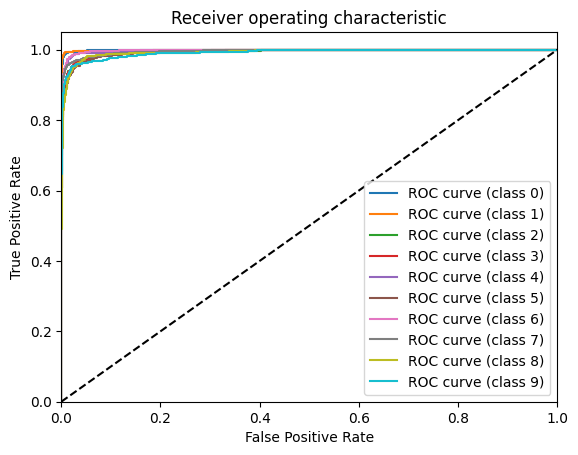

Validation loss: 0.24628916382789612
Validation accuracy: 0.9279000163078308


In [88]:

print("=====================================")
print("Model evaluatie op gefilterde testdata")

# Evaluatie van het model op gefilterde testdata
val_loss, val_acc = model.evaluate(x_test, y_test)

# Auroc evaluatie 
y_pred = model.predict(x_test)
auroc = metrics.roc_auc_score(y_test, y_pred, multi_class='ovo')

print(f"AUROC: {auroc}")
# plot auroc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test, y_pred[:, i], pos_label=i)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_acc}")
print("=====================================")








### Verwarrings Matrix

Confusion matrix
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


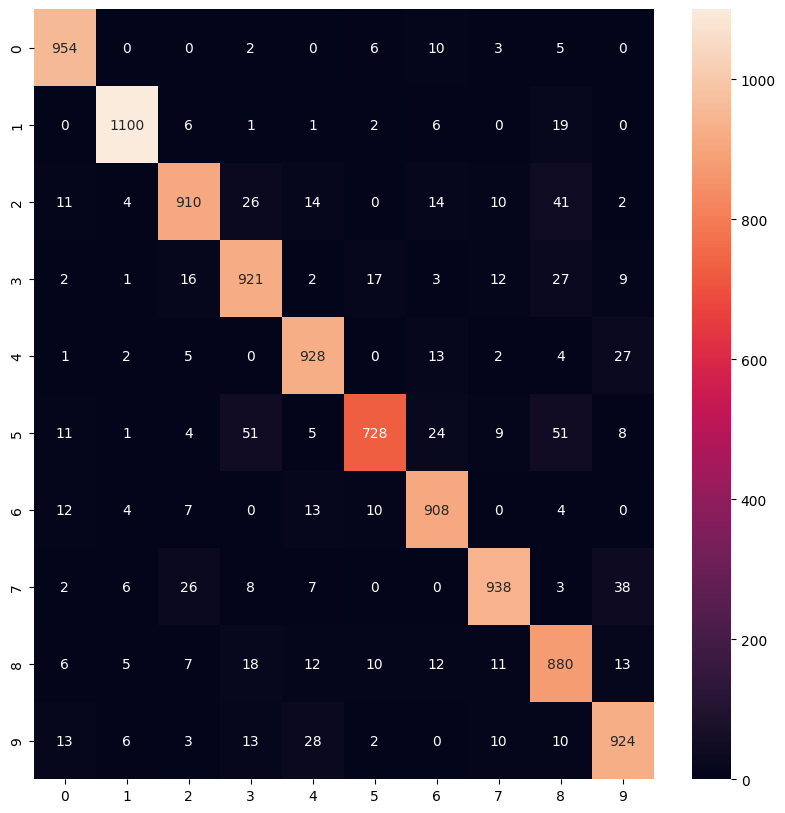

In [82]:
print("=====================================")
print("Confusion matrix")

# Confusion matrix
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Genereer de verwarringsmatrix voor alle getallen 0-9
cm = confusion_matrix(y_test, y_pred)

# Plot de verwarringsmatrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print("=====================================")

